# 1. data wrangling

In [172]:
import pandas as pd

In [173]:
data = pd.read_csv('Data analytics Consultancy - Tags Extraction and Analysis Exercise.csv',encoding='cp949')

In [174]:
data

,Name,Tags
0,2015.08.27_Proposal_Benin_UNEP.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1,"1. NDA, CP_IUCN_BFA-RS-001",NaN
2,2. SF_FAO_BFA-RS-002,NaN
3,2016.10.10_Proposal_Burkina Faso_IUCN.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
4,2017.08.11_Agreement_BFA-RS-001.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
...,...,...
1298,Deliverable-3.2.1a.1.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1299,Deliverable-3.2.1a.2.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1300,Deliverable-3.2.1a.3.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1301,Deliverable-4.5.1.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."


In [175]:
data[0:5]

,Name,Tags
0,2015.08.27_Proposal_Benin_UNEP.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1,"1. NDA, CP_IUCN_BFA-RS-001",NaN
2,2. SF_FAO_BFA-RS-002,NaN
3,2016.10.10_Proposal_Burkina Faso_IUCN.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
4,2017.08.11_Agreement_BFA-RS-001.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."


In [176]:
df = data.dropna()

In [177]:
df

,Name,Tags
0,2015.08.27_Proposal_Benin_UNEP.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
3,2016.10.10_Proposal_Burkina Faso_IUCN.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
4,2017.08.11_Agreement_BFA-RS-001.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
5,2017.04.28_Proposal_Burkina Faso_FAO.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
6,2018.02.23_Approval Memo_Burkina_Faso_FAO.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
...,...,...
1298,Deliverable-3.2.1a.1.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1299,Deliverable-3.2.1a.2.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1300,Deliverable-3.2.1a.3.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
1301,Deliverable-4.5.1.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."


In [178]:
df.describe()

,Name,Tags
count,1074,1074
unique,1037,617
top,Letter of Authorization.pdf,"{""Extraction"":0,""Tags"":[],""UnwantedTags"":[]}"
freq,4,359


In [179]:
df = df.drop_duplicates(['Name','Tags'])

In [180]:
df.describe()

,Name,Tags
count,1054,1054
unique,1037,617
top,Summary.pdf,"{""Extraction"":0,""Tags"":[],""UnwantedTags"":[]}"
freq,3,350


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1054 non-null   object
 1   Tags    1054 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


In [182]:
df.describe()

,Name,Tags
count,1054,1054
unique,1037,617
top,Summary.pdf,"{""Extraction"":0,""Tags"":[],""UnwantedTags"":[]}"
freq,3,350


In [183]:
df[0:5]

,Name,Tags
0,2015.08.27_Proposal_Benin_UNEP.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
3,2016.10.10_Proposal_Burkina Faso_IUCN.docx,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
4,2017.08.11_Agreement_BFA-RS-001.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
5,2017.04.28_Proposal_Burkina Faso_FAO.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."
6,2018.02.23_Approval Memo_Burkina_Faso_FAO.pdf,"{""Extraction"":0,""Tags"":[{""ConceptSchemes"":[{""L..."


In [184]:
import re

In [185]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("[{/?.*?}]", "{}",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

#df_idf['text'] = df_idf['title'] + df_idf['body']
#df_idf['text'] = df_idf['text'].apply(lambda x:pre_process(x))

#show the first 'text'
#df_idf['text'][2]

In [186]:
import re
def pre_process2(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("[^a-zA-Z]", " ",text)
    
    #empty tags 
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text


In [187]:
df1 = df['Tags'].apply(lambda x:pre_process(x))

In [188]:
df1[130]

' extraction tags conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label operational documents uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label approved readiness proposal score conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label readiness programme cycle uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label proposal review score conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label project documents uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label readiness and preparatory support proposal score conceptschemes label http vocabulary gcfund org gcf_readinesstaxonomy uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts url htt

In [189]:
df2 = df['Name'].apply(lambda x:pre_process2(x))

In [190]:
df2[13]

' proposal cameroon iucn docx'

In [191]:
#If this is the first time importing the stopwords package /
#you must first download the stopwords using nltk.download('stopwords')
import re
import pandas
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gwans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gwans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [192]:
raw_word_counts = pandas.Series(''.join(df2).split()).value_counts()

In [193]:
raw_word_counts

proposal          166
readiness         165
rs                162
pdf               149
of                107
                 ... 
khatim              1
amel                1
gharbi              1
hedi                1
docxindicative      1
Length: 1082, dtype: int64

In [194]:
corpus = []
#initialize the lemmatizer
lem = WordNetLemmatizer()
#create a set of stopwords
stop_words = set(stopwords.words("english"))
for name in df['Name']:
    #remove all punctuation
    name = re.sub('[^a-zA-Z]', ' ', name)
    #empty tags 
    name = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", name)
    #remove special characters and digits
    name = re.sub("(\\d|\\W)+"," ", name)
    #make all chars lowercase
    name.lower()
    #create a list of words 
    words = name.split()
    text = " ".join([lem.lemmatize(word) for word in words if \
                    word not in stop_words])
    corpus.append(text)
# we have now generated a normalized corpus with only word lemmas and 
corpus[:2]

['Proposal Benin UNEP docx', 'Proposal Burkina Faso IUCN docx']

In [195]:
cv = CountVectorizer(stop_words= stop_words, max_features = 10000, ngram_range= (1,1))

In [196]:
#load the corpus into the CountVectorizer
cv = cv.fit(corpus)
frequency_matrix = cv.transform(corpus)
frequency_matrix

<1054x769 sparse matrix of type '<class 'numpy.int64'>'
	with 5627 stored elements in Compressed Sparse Row format>

In [197]:
sum_words = frequency_matrix.sum(axis = 0)

In [198]:
word_frequencies = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]

In [199]:
word_frequencies = sorted(word_frequencies, key = lambda x: x[1], reverse = True)
word_frequencies[:20]

[('pdf', 615),
 ('docx', 343),
 ('readiness', 196),
 ('proposal', 169),
 ('rs', 162),
 ('gcf', 118),
 ('memo', 113),
 ('nap', 111),
 ('disbursement', 106),
 ('final', 99),
 ('request', 92),
 ('approval', 77),
 ('report', 60),
 ('rwg', 56),
 ('review', 50),
 ('letter', 48),
 ('signed', 47),
 ('planning', 46),
 ('adaptation', 45),
 ('ofac', 39)]

In [200]:
word_frequencies

[('pdf', 615),
 ('docx', 343),
 ('readiness', 196),
 ('proposal', 169),
 ('rs', 162),
 ('gcf', 118),
 ('memo', 113),
 ('nap', 111),
 ('disbursement', 106),
 ('final', 99),
 ('request', 92),
 ('approval', 77),
 ('report', 60),
 ('rwg', 56),
 ('review', 50),
 ('letter', 48),
 ('signed', 47),
 ('planning', 46),
 ('adaptation', 45),
 ('ofac', 39),
 ('spprt', 36),
 ('zimbabwe', 36),
 ('minute', 35),
 ('noa', 35),
 ('prpsl', 35),
 ('effectiveness', 33),
 ('bangladesh', 33),
 ('atg', 33),
 ('opinion', 32),
 ('agreement', 31),
 ('doc', 31),
 ('legal', 31),
 ('drc', 31),
 ('kenya', 31),
 ('xlsx', 30),
 ('niger', 30),
 ('msg', 29),
 ('budget', 28),
 ('inception', 28),
 ('passport', 28),
 ('prprtry', 27),
 ('grant', 26),
 ('sheet', 26),
 ('first', 24),
 ('antigua', 24),
 ('clean', 23),
 ('checklist', 23),
 ('barbuda', 23),
 ('bank', 22),
 ('cse', 21),
 ('revised', 20),
 ('finance', 20),
 ('notification', 19),
 ('mar', 19),
 ('mongolia', 19),
 ('prgrm', 18),
 ('authorization', 17),
 ('draft', 17),

In [201]:
df_name = pd.DataFrame(word_frequencies, columns=['Names', 'Count'])


In [202]:
df_name

,Names,Count
0,pdf,615
1,docx,343
2,readiness,196
3,proposal,169
4,rs,162
...,...,...
764,tor,1
765,consultancy,1
766,deadlines,1
767,corecc,1


In [203]:
import numpy as np
import matplotlib as plt
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors

import logging
import matplotlib.pyplot as plt
#from scipy.sparse import hstack


%matplotlib inline

In [204]:
df_name_sorted = df_name.sort_values(['Count'], ascending=False)
Name_counts = df_name_sorted['Count'].values

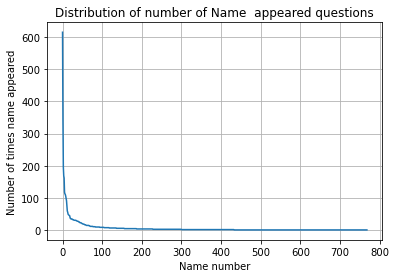

In [205]:
plt.plot(Name_counts)
plt.title("Distribution of number of Name  appeared questions")
plt.grid()
plt.xlabel("Name number")
plt.ylabel("Number of times name appeared")
plt.show()

In [206]:
import numpy as np
import matplotlib.pyplot as plt

In [207]:
tags_corpus = []
#initialize the lemmatizer
lem = WordNetLemmatizer()
#create a set of stopwords
stop_words = set(stopwords.words("english"))
for tag in df['Tags']:
    #remove all punctuation
    tag = re.sub("[{/?.*?}]", "{}", tag)
    #empty tags 
    tag = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", tag)
    #remove special characters and digits
    tag = re.sub("(\\d|\\W)+"," ", tag)
    #make all chars lowercase
    tag.lower()
    #create a list of words 
    words = tag.split()
    text = " ".join([lem.lemmatize(word) for word in words if \
                    word not in stop_words])
    tags_corpus.append(text)
# we have now generated a normalized corpus with only word lemmas and 
tags_corpus[:2]

['Extraction Tags ConceptSchemes Label Partners Uri http vocabulary gcfund org GCF_Readinesstaxonomy BroaderConcepts Url http vocabulary gcfund org GCF_Readinesstaxonomy Label National designated authority Score UnwantedTags eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS xMDMiLCJMYWJlbCI IkFwcHJvdmVkIHJlYWRpbmVzcyBwcm wb NhbCIsIlNjb JlIjo fQ eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS ODIiLCJMYWJlbCI IkNoYW nZSBtYW hZ VtZW IiwiU NvcmUiOjIxfQ eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS xNiIsIkxhYmVsIjoiQ bnRyeSBwcm ncmFtbWUiLCJTY yZSI OX eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS MTciLCJMYWJlbCI IkRlbGl ZXJ IHBhcnRuZXIiLCJTY yZSI MjJ eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS OTciLCJMYWJlbCI IkZvcmVzdHMiLCJTY yZSI MTF eyJVcmwiOiJodHRwOi vdm jYWJ bGFyeS nY Z bmQub JnL dDRl SZWFkaW lc N YXhvbm teS ODYiLCJMYWJlbCI IkZy

In [208]:
cv = CountVectorizer(stop_words= stop_words, max_features = 10000, ngram_range= (1,1))

In [209]:
#load the corpus into the CountVectorizer
cv = cv.fit(tags_corpus)
frequency_matrix = cv.transform(tags_corpus)
frequency_matrix

<1054x693 sparse matrix of type '<class 'numpy.int64'>'
	with 50410 stored elements in Compressed Sparse Row format>

In [210]:
cv

CountVectorizer(max_features=10000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [211]:
sum_words = frequency_matrix.sum(axis = 0)

In [212]:
word_frequencies = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]

In [213]:
word_frequencies = sorted(word_frequencies, key = lambda x: x[1], reverse = True)
word_frequencies[:20]

[('http', 9828),
 ('vocabulary', 9828),
 ('gcfund', 9828),
 ('org', 9828),
 ('gcf_readinesstaxonomy', 9828),
 ('label', 9711),
 ('uri', 6265),
 ('lc', 3746),
 ('eyjvcmwioijodhrwoi', 3720),
 ('vdm', 3720),
 ('jywj', 3720),
 ('bgfyes', 3720),
 ('ny', 3720),
 ('bmqub', 3720),
 ('jnl', 3720),
 ('ddrl', 3720),
 ('szwfkaw', 3720),
 ('yxhvbm', 3720),
 ('tes', 3720),
 ('conceptschemes', 3446)]

In [214]:
word_frequencies

[('http', 9828),
 ('vocabulary', 9828),
 ('gcfund', 9828),
 ('org', 9828),
 ('gcf_readinesstaxonomy', 9828),
 ('label', 9711),
 ('uri', 6265),
 ('lc', 3746),
 ('eyjvcmwioijodhrwoi', 3720),
 ('vdm', 3720),
 ('jywj', 3720),
 ('bgfyes', 3720),
 ('ny', 3720),
 ('bmqub', 3720),
 ('jnl', 3720),
 ('ddrl', 3720),
 ('szwfkaw', 3720),
 ('yxhvbm', 3720),
 ('tes', 3720),
 ('conceptschemes', 3446),
 ('broaderconcepts', 3446),
 ('url', 3446),
 ('score', 3446),
 ('document', 2097),
 ('readiness', 1513),
 ('type', 1203),
 ('yzsi', 1114),
 ('extraction', 1054),
 ('tags', 1054),
 ('unwantedtags', 1054),
 ('programme', 891),
 ('programmes', 860),
 ('proposal', 815),
 ('fq', 784),
 ('preparatory', 691),
 ('support', 691),
 ('partners', 646),
 ('knowledge', 642),
 ('framework', 475),
 ('iiwiu', 467),
 ('operational', 464),
 ('partnership', 456),
 ('strategic', 438),
 ('project', 436),
 ('nvcmuioje', 435),
 ('national', 418),
 ('approved', 383),
 ('ik', 333),
 ('designated', 321),
 ('authority', 321),
 ('cy

# 2. Word cloud

There are 44699 words in the combination of all Names.


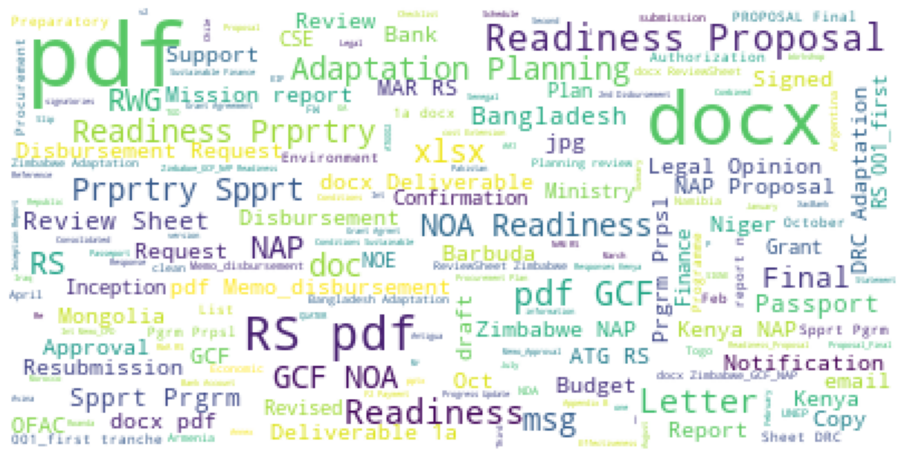

In [215]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(name for name in df['Name'])
print ("There are {} words in the combination of all Names.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

There are 1687876 words in the combination of all Tags.


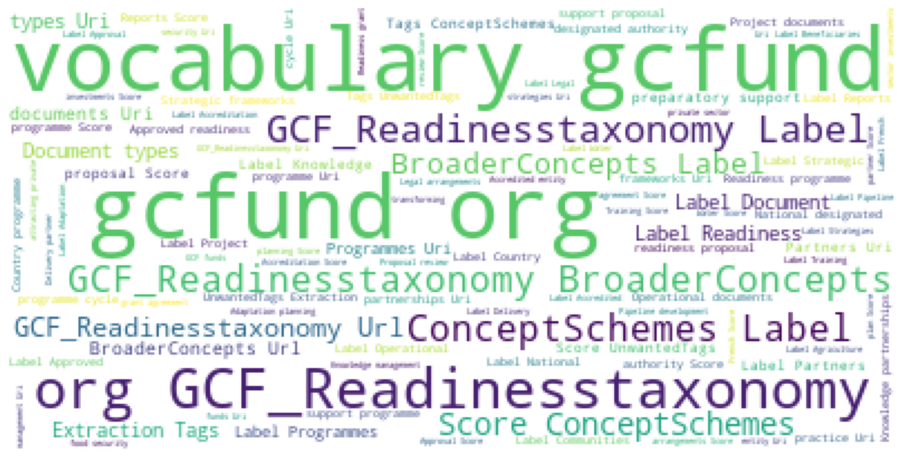

In [216]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tag for tag in df['Tags'])
print ("There are {} words in the combination of all Tags.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

In [217]:
corpus_str = ""

for name in df['Name']:
    #remove all punctuation
    name = re.sub('[^a-zA-Z]', ' ', name)
    #empty tags 
    name = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", name)
    #remove special characters and digits
    name = re.sub("(\\d|\\W)+"," ", name)
    #make all chars lowercase
    corpus_str = " ".join((corpus_str, name))
corpus_str[:1000]

'  Proposal Benin UNEP docx  Proposal Burkina Faso IUCN docx  Agreement BFA RS pdf  Proposal Burkina Faso FAO pdf  Approval Memo Burkina Faso FAO pdf  Notification of Approval Burkina Faso FAO pdf  Proposal Burundi UNDP doc  Approval Memo Burundi UNDP pdf  Proposal Cameroon IUCN docx  Disbursement Memo CMR RS pdf Cmr GCF budget juin xlsx trail email from Procurement pdf  Proposal CAR UNDP docx Chile Approval Form pdf  Effectiveness TCD RS pdf Acknowledgement Effectiveness Chad docx Aurthorized signatories Tchad NDA CSE pdf Chad Readiness proposal final Oct docx Chad Inception Report docx Chad Proposal Budget rev xlsx Disbursement request NDA Tchad CSE Nov pdf grant agreement Chad signed pdf Legal opinion Tchad pdf Memo disbursement Request Chad docx Memo Disbursement Signed TCD RS pdf Comoros READINESS PROGRAMME REVU DOCX  Proposal Cote d ivoire CSE docx  Approval Memo Cote d Ivoire CSE pdf  Agreement CIV RS pdf  Effectiveness CIV RS PDF  first disbursement CIV RS pdf  Disbursement Mem

In [218]:
import pycountry
Cntr = []
for country in pycountry.countries:
    if country.name in corpus_str:
        Cntr.append(country.name)

In [219]:
len(Cntr)

60

In [220]:
Cntr

['Albania',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Azerbaijan',
 'Burundi',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belize',
 'Barbados',
 'Bhutan',
 'Chile',
 'Cameroon',
 'Congo',
 'Comoros',
 'Djibouti',
 'Egypt',
 'Ethiopia',
 'Gabon',
 'Georgia',
 'Guinea',
 'Gambia',
 'Equatorial Guinea',
 'India',
 'Iraq',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 'Libya',
 'Morocco',
 'Madagascar',
 'Maldives',
 'Mali',
 'Montenegro',
 'Mongolia',
 'Mozambique',
 'Mauritania',
 'Mauritius',
 'Malaysia',
 'Namibia',
 'Niger',
 'Nepal',
 'Oman',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Chad',
 'Togo',
 'Tajikistan',
 'Tonga',
 'Tunisia',
 'South Africa',
 'Zambia',
 'Zimbabwe']

There are 60 countries in the Names.


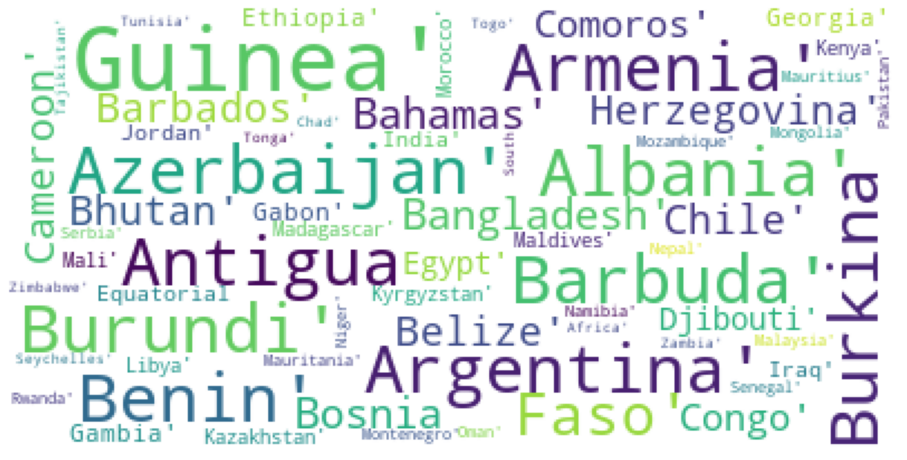

In [221]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
#text = " ".join(name for name in corpus_str)
print ("There are {} countries in the Names.".format(len(Cntr)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(Cntr))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

# 3. Exploratory analysis with Latent Dirichlet Allocation

In [222]:
import numpy as np
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors

import logging

#from scipy.sparse import hstack


%matplotlib inline

In [223]:
df['Tags'] = df['Tags'].apply(lambda x:pre_process(x))

C:\Users\gwans\AppData\Local\Temp\ipykernel_7492\4234369966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'] = df['Tags'].apply(lambda x:pre_process(x))


In [224]:
df['Name'] = df['Name'].apply(lambda x:pre_process2(x))

C:\Users\gwans\AppData\Local\Temp\ipykernel_7492\4215931509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = df['Name'].apply(lambda x:pre_process2(x))


In [225]:
df

,Name,Tags
0,proposal benin unep docx,extraction tags conceptschemes label partners...
3,proposal burkina faso iucn docx,extraction tags conceptschemes label partners...
4,agreement bfa rs pdf,extraction tags conceptschemes label document...
5,proposal burkina faso fao pdf,extraction tags conceptschemes label document...
6,approval memo burkina faso fao pdf,extraction tags conceptschemes label programm...
...,...,...
1298,deliverable a docx,extraction tags conceptschemes label partners...
1299,deliverable a docx,extraction tags conceptschemes label partners...
1300,deliverable a docx,extraction tags conceptschemes label partners...
1301,deliverable docx,extraction tags conceptschemes label programm...


In [226]:
token=ToktokTokenizer()

In [227]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [228]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [229]:
df2

0                  proposal benin unep docx
3           proposal burkina faso iucn docx
4                      agreement bfa rs pdf
5             proposal burkina faso fao pdf
6        approval memo burkina faso fao pdf
                       ...                 
1298                     deliverable a docx
1299                     deliverable a docx
1300                     deliverable a docx
1301                       deliverable docx
1302               deliverable a draft docx
Name: Name, Length: 1054, dtype: object

In [230]:
df2 = df2.apply(lambda x: lemitizeWords(x)) 
df2= df2.apply(lambda x: stopWordsRemove(x)) 

In [231]:
no_topics = 20

In [232]:
text = df2

In [233]:
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)

In [234]:
TF_IDF_matrix = vectorizer_train.fit_transform(text) 

In [235]:
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)


In [236]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        

no_top_words = 10
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

Topic 0:
proposal readiness final docx rwg pdf minutes nap gcf opinion
Topic 1:
income expense statement software hardware list dec apr ambique xls
Topic 2:
tor consultancy annex reference appendix docx term country programme meruzhangalstyan
Topic 3:
deliverable docx memo approval request disbursement pdf ofac chile atg
Topic 4:
calderon javier pasaporte southafrica nod comoros revu sanbi programme pdf
Topic 5:
effectiveness chile notification letter pdf docx rs ackowledgement account acknowledgement
Topic 6:
checklist docx mongolia oman bolivia armenia pakistan zambia tunisia togo
Topic 7:
gambia senegal omar dini abdallah disbursementform pdf bicis central autorisation
Topic 8:
spprt noa gcf prpsl prprtry readiness pdf prgrm extension cost
Topic 9:
report inception mission aa docx document pdf audit cse readinesstogo
Topic 10:
rs pdf sign letter disbursement agreement grant authorization passport atg
Topic 11:
jpg passeport passport zip se congo attachments pdf hanibal yassine
Topic

In [237]:
pd.DataFrame(df['Tags'].value_counts()).head(10)

,Tags
extraction tags unwantedtags,357
extraction tags conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts url http vocabulary gcfund org gcf_readinesstaxonomy label reports score unwantedtags,66
extraction tags conceptschemes label knowledge partnerships uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label communities of practice uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label adaptation planning score conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label readiness programme cycle uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label approval score conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label operational documents uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label approved readiness proposal score conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label strategic frameworks uri http vocabulary gcfund org gcf_readinesstaxonomy label readiness and preparatory support programme uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label country programme score conceptschemes label partners uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label delivery partner uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label pipeline development score conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label readiness programme cycle uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label proposal review score conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label project documents uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label readiness and preparatory support proposal score unwantedtags eyjvcmwioijodhrwoi vdm jywj bgfyes ny z bmqub jnl ddrl szwfkaw lc n yxhvbm tes yotailcjmywjlbci ik hdglvbmfsigrlc lnbmf zwqgyxv ag yaxr iiwiu nvcmuioje fq,8
extraction tags conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label strategic frameworks uri http vocabulary gcfund org gcf_readinesstaxonomy label readiness and preparatory support programme uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label country programme score conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label readiness programme cycle uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label legal arrangements score conceptschemes label document types uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label operational documents uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label readiness grant agreement score unwantedtags,6
extraction tags conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label readiness programme cycle uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfund org gcf_readinesstaxonomy label approval score unwantedtags,5
extraction tags conceptschemes label programmes uri http vocabulary gcfund org gcf_readinesstaxonomy broaderconcepts label strategic frameworks uri http vocabulary gcfund org gcf_readinesstaxonomy label readiness and preparatory support programme uri http vocabulary gcfund org gcf_readinesstaxonomy url http vocabulary gcfu

# 4.Modeling(Just experimental playground)

In [238]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [239]:
# this will be taking so much time try not to run it, download the lr_with_equal_weight.pkl file and use to predict
# This takes about 6-7 hours to run.
classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(x_train_multilabel, y_train)
predictions = classifier.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.2559241706161137
macro f1 score : 0.003546853437683132
micro f1 scoore : 0.2559241706161137
hamming loss : 0.7440758293838863
Precision recall report :
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

C:\Users\gwans\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gwans\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gwans\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\